In [1]:
# Conjunto de dados Econômicos do Brasil 

# Dados da renda per capita dos estados união

# Renda per Capita: É um dos indicadores socioeconomicos que avaliam
# o grau de desenvolvimento econômico de um determinado lugar. A
# média é obtida através da divisão do Produto Nacional Bruto


# Import das bibliotecas necessárias para a análise

# Import da biblioteca que irá possibilitar acessar, manipular
# e modificar os dados do dataset
import pandas as pd

# biblioteca que possui uma grande quantidade de gráficos

import seaborn as sns

# Biblioteca que ira possibilitar criar e personalizar gráficos
import matplotlib.pyplot as plt

In [2]:
# Acessando os dados do dataset
base_dados = pd.read_csv('dadospib.csv')

In [3]:
# Mostrando as 5 primeiras linhas do dataframe

print("AS 5 PRIMEIRAS LINHAS DO DARAFRAME")

print(base_dados.head())

AS 5 PRIMEIRAS LINHAS DO DARAFRAME
  Territorialidades   Ano PIB per capita
0            Brasil  2013           22,2
1              Acre  2013          12,37
2           Alagoas  2013           9,45
3             Amapá  2013          14,53
4          Amazonas  2013          18,25


In [4]:
# Visualizando as informações gerais do dataframe
print("INFORMAÇÕES GERAIS DO DATAFRAME")

print(base_dados.info())


INFORMAÇÕES GERAIS DO DATAFRAME
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112 entries, 0 to 111
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Territorialidades  112 non-null    object
 1   Ano                112 non-null    int64 
 2   PIB per capita     112 non-null    object
dtypes: int64(1), object(2)
memory usage: 2.8+ KB
None


In [5]:
# para facilitar a nossa análise, vou renomear a coluna 'Territorialidades' para 'Territórios'

base_dados.rename(columns={
    
    'Territorialidades': 'Territorio'
    
}, inplace=True)


In [6]:
# Visualizando a se o nome da coluna foi alterado

print("VERIFICANDO SE O NOME DA COLUNA FOI ALTERADO")

print(base_dados.columns)


VERIFICANDO SE O NOME DA COLUNA FOI ALTERADO
Index(['Territorio', 'Ano', 'PIB per capita'], dtype='object')


In [7]:
# Verificando o total de valores nulos das colunas

print("TOTAL DE VALORES NULOS DAS COLUNAS")

print(base_dados.isnull().sum())


TOTAL DE VALORES NULOS DAS COLUNAS
Territorio        0
Ano               0
PIB per capita    0
dtype: int64


In [8]:
# Convertendo para numérico possiveis valores objects da coluna 
# 'PIB per capita'.

# Antes das conversões, precisamos substituir as virgulas por pontos
# usando o metodo replace que recebe como argumento o valor que será
# substituido  e valor que irá substituir o valor anterior
base_dados['PIB per capita'] = base_dados['PIB per capita'].str.replace(',', '.')


# Trecho que ira transformar os valores da coluna 'PIB per capita'
# em tipos numéricos.

base_dados['PIB per capita'] = pd.to_numeric(base_dados['PIB per capita'])

# Também será interessante converter a coluna de 'Ano' para Date
# O format (argumento opcional) serve para configurar o formato que a data será representada
# na coluna
base_dados['Ano'] = pd.to_datetime(base_dados['Ano'], format='%Y')

# Após a conversão, vamos extrair apenas o ano da data
base_dados['Ano'] = base_dados['Ano'].dt.year

In [9]:
# Verificando se as conversões funcionaram
print("VERIFICANDO SE AS CONVERSÕES FUNCIONARAM")

# Ira retornar o tipo das colunas
print(base_dados.dtypes)

# Observação: Como extraimos apenas o ano das datas ele permanecerá como inteiro

VERIFICANDO SE AS CONVERSÕES FUNCIONARAM
Territorio         object
Ano                 int32
PIB per capita    float64
dtype: object


In [10]:
# verificando se os pontos foram adicionados no valor da coluna
# de PIB

print("VERIFICANDO SE AS VIRGULAS FORAM SUBSTITUIDAS")
print(base_dados.head())

VERIFICANDO SE AS VIRGULAS FORAM SUBSTITUIDAS
  Territorio   Ano  PIB per capita
0     Brasil  2013           22.20
1       Acre  2013           12.37
2    Alagoas  2013            9.45
3      Amapá  2013           14.53
4   Amazonas  2013           18.25


In [11]:
# Agrupando os dados por território
print('AGRUPANDO OS DADOS POR TERRITÓRIO')
# Vamos agrupar os valores por território para ver a média dos
# territórios nas colunas numéricas do dataframe
print(base_dados.groupby(by=['Territorio']).mean())

AGRUPANDO OS DADOS POR TERRITÓRIO
                        Ano  PIB per capita
Territorio                                 
Acre                 2014.5         12.3000
Alagoas              2014.5          9.7400
Amapá                2014.5         13.4500
Amazonas             2014.5         16.6250
Bahia                2014.5         11.4825
Brasil               2014.5         21.5000
Ceará                2014.5         10.6150
Distrito Federal     2014.5         53.2925
Espírito Santo       2014.5         23.0025
Goiás                2014.5         19.1425
Maranhão             2014.5          8.3800
Mato Grosso          2014.5         24.1975
Mato Grosso do Sul   2014.5         22.8025
Minas Gerais         2014.5         18.6575
Paraná               2014.5         24.5500
Paraíba              2014.5         10.1250
Pará                 2014.5         11.8825
Pernambuco           2014.5         12.4800
Piauí                2014.5          8.7225
Rio Grande do Norte  2014.5         12.167

In [12]:
 #Agrupando os dados por território e ano

print("AGRUPANDO OS DADOS POR TERRITÓRIO E ANO")

# Nesse trecho ele vai retornar a média dos valores da coluna
# 'Território' em cada coluna nummerica por ano.
print(base_dados.groupby(by=['Territorio', 'Ano']).mean())

# A idéia principal é criar um relatório utilizando o seaborn
# para criar um grid de graficos (até onde entendi é uma imagem
# que contem varios tipos de graficos diferentes)

AGRUPANDO OS DADOS POR TERRITÓRIO E ANO
                 PIB per capita
Territorio Ano                 
Acre       2013           12.37
           2014           13.41
           2015           12.24
           2016           11.18
Alagoas    2013            9.45
...                         ...
São Paulo  2016           30.24
Tocantins  2013           13.47
           2014           13.77
           2015           13.79
           2016           13.68

[112 rows x 1 columns]


In [13]:
# A idéia principal é criar um relatório utilizando o seaborn
# para criar um grid de graficos (até onde entendi é uma imagem
# que contem varios tipos de graficos diferentes)

# Primeiro, vamos definir a cor de fundo da imagem dos gráficos
cor_fundo = '#f5f5f5'

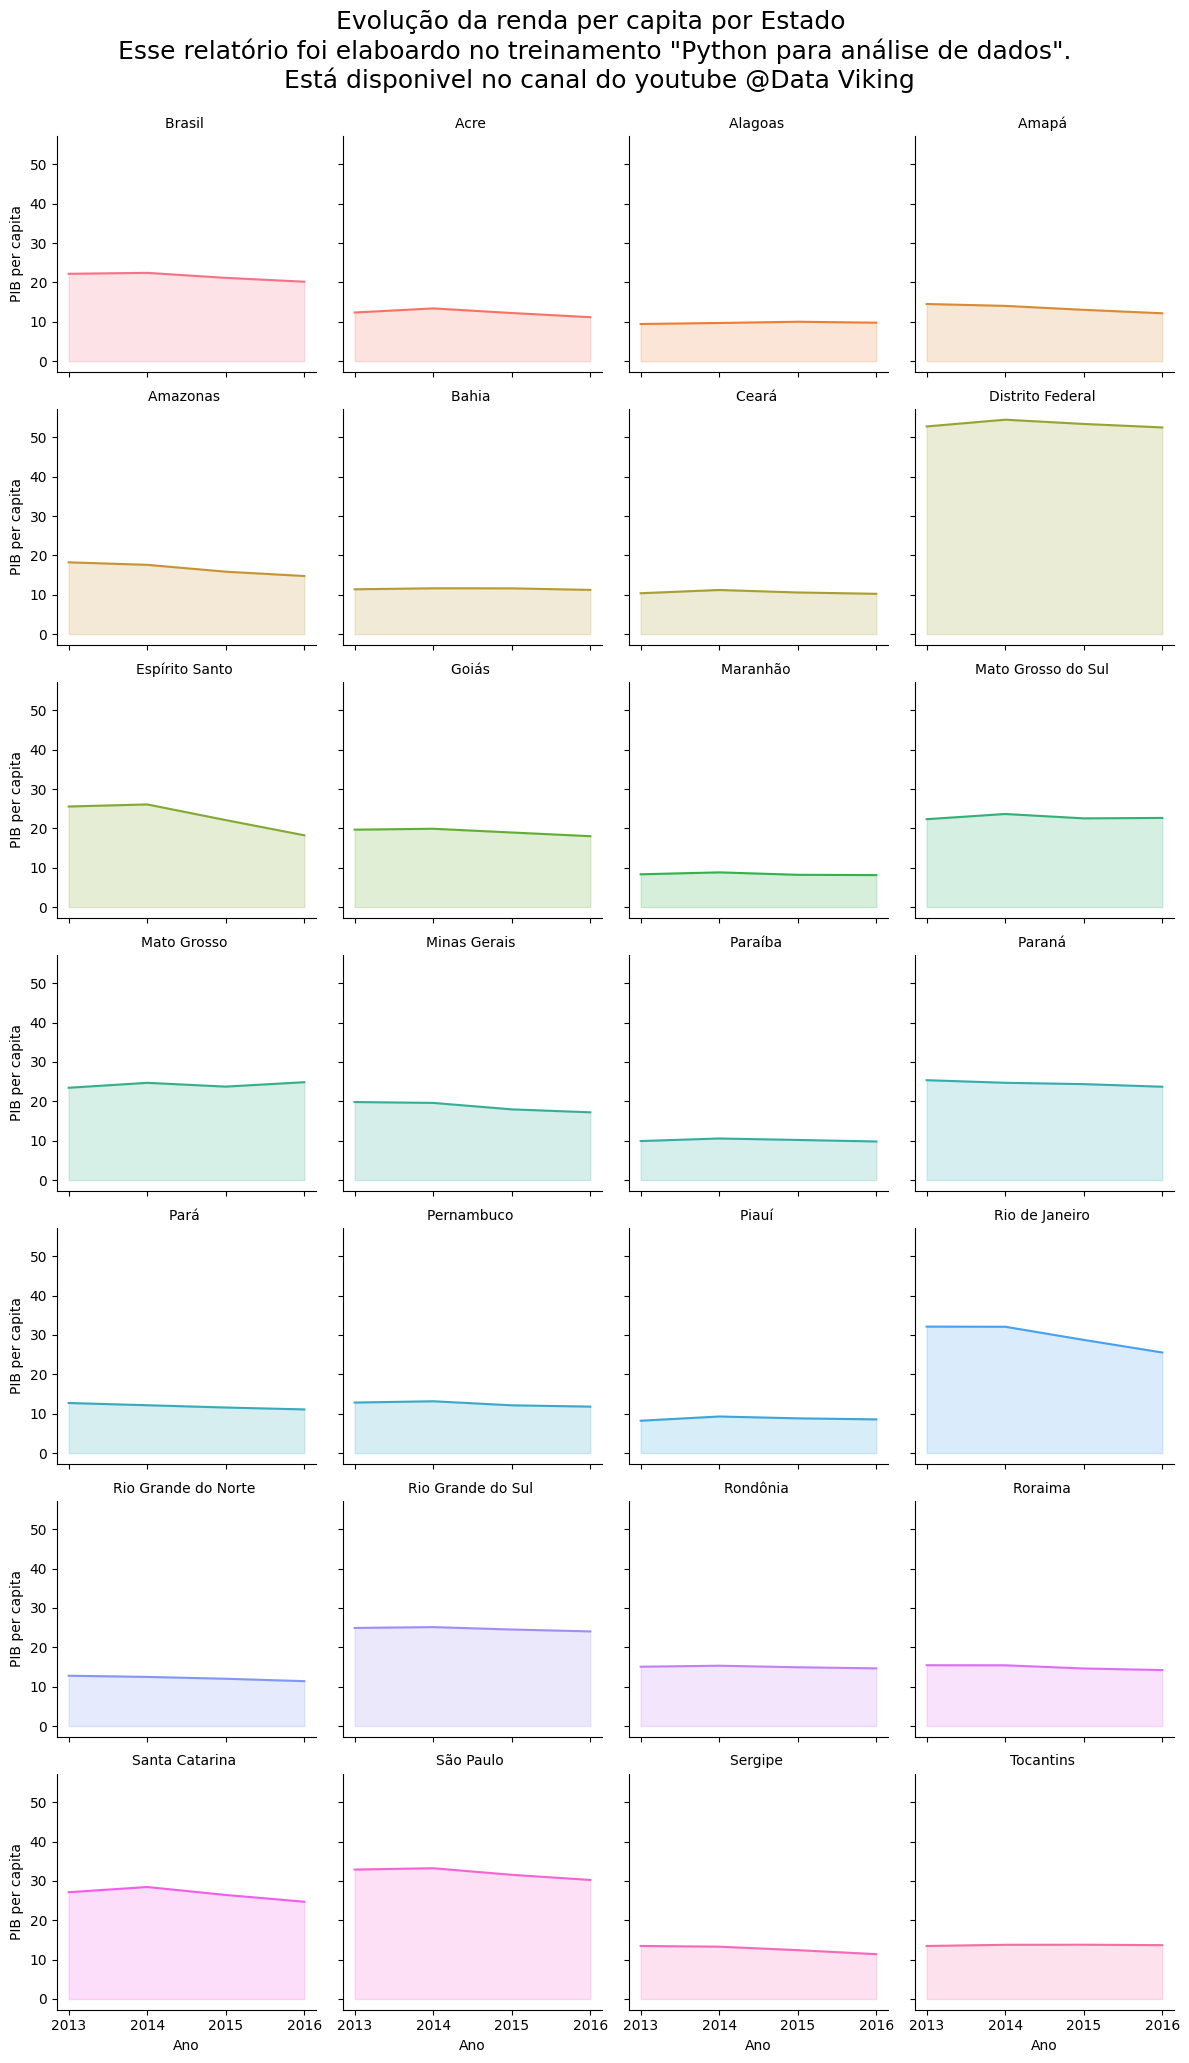

In [14]:
# Criando o sistema de grids
# FacetGrid: é uma estrutura de gráficos do seaborn que permite criar 
# uma grade de subgráficos, onde cada subgráfico representa um subconjunto dos dados com base em alguma caracteristica(variável).

# base_dados: DataFrame que contem os dados que serão utilizados na 
# construção dos graficos

# col: é usada para dividir os dados em colunas, criando um gráfico
# separado para cada valor único da variável ('território' no caso).
# Ou seja, ele vai criar uma faceta (um subgráfico) para cada território 
# presente no Dataframe 'base_dados'.

# hue: Define uma variável para a qual as cores dos gráficos serão atribuidas. Nesse caso, como é a mesma variável Territorio, o seaborn
# usará cores diferentes para representar os diferentes territórios 
# dentro de cada faceta.

# col_wrap: Define quantas colunas de subgraficos serão exibidas antes
# de ir para a proxima linha. Nesse caso, col_wrap=4 significa que serão
# exibidos até 4 subgraficos por linha. Se houver mais de 4 territórios
# unicos, as facetas seguintes irão para a linha seguinte.
grid_graficos = sns.FacetGrid(base_dados, col='Territorio', hue='Territorio', col_wrap=4)

# Comando que irá adicionar um gráfico de linhas em cada gráfico.
# Eixo X: Terá os valores da coluna 'Ano'
# Eixo y: Terá os valores da coluna 'PIB per capita'.
grid_graficos = grid_graficos.map(plt.plot, 'Ano', 'PIB per capita')

# Adicionando uma sombra entre as linhas e o final dos gráficos.
# A função plt.fill_between preenche a área entre duas linhas 
# em um gráfico. Ou seja, preenche a area entre o eixo x e a linha
# do grafico representada por 'PIB per capita'.
# alpha: Define a transparência da area preenchida.
# set_titles: serve para personalizar/customizar esses titulos. Recebe
# como argumento o {col_name} é um placeholder que será substituido
# automaticamente pelo nome da categoria associada á faceta(ou coluna,
# no caso de variáveis categóricas organizadas por colunas.)
# O novo titulo será o nome das colunas.
grid_graficos = grid_graficos.map(plt.fill_between, 'Ano', 'PIB per capita', alpha=0.2).set_titles('{col_name} ')

# Adicionando um subtitulo no grid de graficos. O tamanho da fonte será
# 18.
grid_graficos = grid_graficos.fig.suptitle('Evolução da renda per capita por Estado \n Esse relatório foi elaboardo no treinamento "Python para análise de dados". \n Está disponivel no canal do youtube @Data Viking', fontsize=18)

# Agora vamos ajustar o subtitulo para evitar que ele sobreponha
# os graficos
plt.subplots_adjust(top=0.92)

